In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder, StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score, make_scorer, f1_score
from collections import Counter
import scipy.stats as stats # for the breakpoints in SAX
from scipy.stats import norm
from Symbol import SYMBOLS
from distances import MINDIST
import warnings 
#from dtw import dtw
##from sklearn.model_selection import GridSearchCV
#from tslearn.neighbors import KNeighborsTimeSeriesClassifier
#from tslearn.utils import to_time_series_dataset
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import precision_recall_curve, average_precision_score
#from sklearn.metrics import roc_curve, auc

from SAX_transf import *


warnings.filterwarnings('ignore')
import os
import aeon
from aeon.datasets import load_classification

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
train_path = os.path.join(os.getcwd(), "datasets/classification/ECG200/ECG200_TRAIN.ts")
test_path = os.path.join(os.getcwd(), "datasets/classification/ECG200/ECG200_TEST.ts")

X_train = pd.read_csv(train_path, 
                      sep=",", 
                      header=None
                      )

X_train.columns = list(X_train.columns[:-1]) + ['label']
x_train, y_train = X_train.iloc[:, :-1], X_train["label"]

y_train = y_train.replace(-1, 0)

X_test = pd.read_csv(test_path, 
                      sep=",", 
                      header=None
                      )

X_test.columns = list(X_test.columns[:-1]) + ['label']
x_test, y_test = X_test.iloc[:, :-1], X_test["label"]

y_test = y_test.replace(-1, 0)

In [3]:
test_serie_centered = x_test.iloc[0] - x_test.iloc[0].mean()
sax_trans = SAX_transform(test_serie_centered, 20, 5)
D_sax_rep = sax_trans.transf_1d_sax(8, 8)
D_sax_rep


[63, 40, 52, 16, 8, 0, 0, 5, 7, 31, 55, 51, 50, 45, 41, 40, 34, 36, 47, 26]

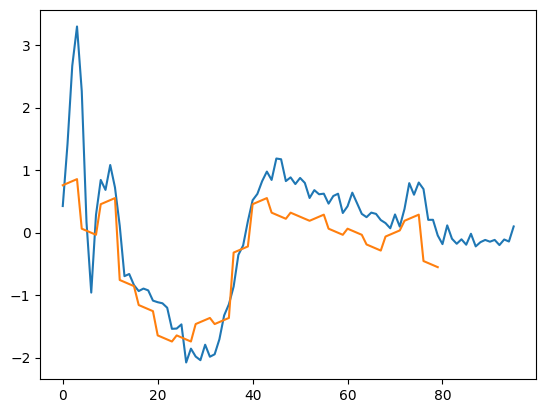

In [4]:
reconstructed_serie = sax_trans.reconstruct_from_1d_sax(D_sax_rep, 20, 5)

plt.plot(test_serie_centered)
plt.plot(reconstructed_serie)
plt.show()

In [5]:
one_knn = SYMBOLS(X_train=X_train,
                  X_test=X_test,
                  method="oneD_SAX",
                  Na= 4, 
                  Ns= 4,
                  )

In [6]:
one_knn.predict_oneD()

[15, 12, 8, 4, 4, 0, 0, 0, 1, 2, 3, 3, 7, 11, 10, 15, 11, 10, 9, 13]
[9, 4, 3, 0, 0, 3, 3, 7, 11, 15, 13, 12, 12, 8, 8, 8, 14, 8, 4, 11]
[11, 13, 8, 4, 4, 0, 0, 0, 0, 2, 3, 7, 11, 11, 15, 15, 13, 15, 11, 14]
[15, 12, 12, 8, 4, 5, 0, 0, 0, 0, 3, 3, 7, 11, 10, 9, 10, 8, 9, 15]
[15, 12, 12, 0, 0, 0, 0, 0, 3, 7, 15, 12, 12, 10, 8, 9, 9, 10, 11, 9]
[15, 4, 8, 0, 0, 0, 3, 3, 3, 7, 11, 13, 15, 10, 15, 11, 10, 10, 15, 8]
[15, 12, 4, 7, 4, 0, 3, 0, 0, 0, 3, 3, 7, 11, 11, 9, 8, 11, 9, 9]
[15, 12, 4, 7, 4, 0, 0, 0, 3, 3, 7, 11, 11, 10, 8, 9, 15, 10, 8, 9]
[15, 4, 4, 0, 2, 0, 0, 3, 3, 7, 15, 12, 13, 15, 14, 9, 8, 9, 15, 9]
[15, 15, 12, 0, 0, 2, 0, 3, 3, 7, 14, 8, 9, 8, 10, 8, 8, 9, 11, 9]
[15, 12, 11, 11, 4, 5, 0, 0, 0, 3, 3, 7, 11, 15, 8, 8, 11, 11, 15, 8]
[15, 12, 8, 7, 0, 0, 0, 1, 3, 3, 3, 7, 11, 9, 9, 8, 10, 15, 15, 8]
[7, 0, 3, 3, 2, 2, 3, 7, 11, 9, 8, 11, 11, 11, 8, 8, 15, 12, 8, 15]
[15, 8, 12, 4, 0, 0, 0, 3, 3, 7, 15, 13, 12, 9, 9, 8, 9, 11, 11, 4]
[15, 15, 12, 11, 4, 4, 4, 4, 1, 0, 0, 1, 